# **Funciones irracionales**

## Integrantes

- Walter Rafael Morales Henriquez     
  00019618

- Fernando Miguel Rodriguez Gonzalez     
  00211919

- Bryan Salvador Flores Flores    
  00063820
  
- Joaquin Ernesto Santos Acosta     
  00159619

# Método de Müller

El método de Müller es una forma generalizada del método de la secante y consiste en obtener los coeficientes de la parábola que pasa por tres puntos. Dichos coeficientes se sustituyen en la fórmula cuadrática para obtener el valor donde la parábola corta al eje X, en otras palabras, la raiz estimada.

El calculo de la raiz se facilita al escribir la ecuación de la parábola de esta forma:

$f_2(x) = a(x-x_2)^2 + b(x-x_2) + c$

Los coeficientes $ a, b$ y $c$ se obtienen a partir de las siguientes ecuaciones:


$a= \frac{\delta_1 - \delta_0}{h_1 - h_0}$, $b=ah_1+\delta_1$ y $c=f(x_2)$

Donde:
$\delta_0=\frac{f(x_1)-f(x_0)}{x_1-x_0}$,
$\delta_1=\frac{f(x_2)-f(x_1)}{x_2-x_1}$,
$h_0=x_1-x_0$,
$h_1=x_2-x_1$

## Implementación
Se desea encontrar la raiz de la siguiente función:
$f(x)=x\sqrt{x}+ 2x^2+10x-20$ con los valores iniciales: $x_0=4.5$, $x_1=5.5$ y $x_2=5$ y con una tolerancia de $10^{-4}$

### Importando librerias a utilizar e inicializando variables
Antes de iniciar a codificar el algoritmo, se importan todas las librerias que se necesitaran para la ejecución del mismo. Además, se inicializan las variables que se utilizaran para la tabulacion y graficacion de los resultados. Esto se hace de la siguiente forma:

In [51]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preparando listados a usar en las tablas
ListaXa = []
ListaXb = []
ListaXc = []
ListaXr = []
ListaErr = []
ListaA = []
ListaB = []
ListaC = []

Una vez definidas las variables e importadas las librerias necesarias, se inicia definiendo la funcion a utilizar.

In [52]:
# Definiendo funcion a utilizar
def f(x):
    return (x * math.sqrt(x) + 10 * x - 20)

Ahora, definimos la función para ejecutar el metodo de Muller de la siguiente forma:

**Recordando funcionamiento del metodo de Muller:**
> El algoritmo recibe los 3 puntos inicales y a partir de estos se calculan las constantes a,b y c requeridas para la ecuacion de la parabola, la cual nos ayuda a encontrar la raiz estimada de la funcion. Una vez obtenida la raiz se confirma que el error absoluto es menor a la tolerancia, de lo contrario se realiza una nueva iteracion.

In [53]:
def Muller(x0, x1, x2):

    res = 0

    while (True):

        # Calculando constantes
        f1 = f(x0); f2 = f(x1); f3 = f(x2)
        d1 = f1 - f3
        d2 = f2 - f3
        h1 = x0 - x2
        h2 = x1 - x2
        a0 = f3
        a1 = (((d2 * pow(h1, 2)) -
               (d1 * pow(h2, 2))) /
              ((h1 * h2) * (h1 - h2)))
        a2 = (((d1 * h2) - (d2 * h1)) /
              ((h1 * h2) * (h1 - h2)))
        x = ((-2 * a0) / (a1 +
             abs(math.sqrt(a1 * a1 - 4 * a0 * a2))))
        y = ((-2 * a0) / (a1 -
            abs(math.sqrt(a1 * a1 - 4 * a0 * a2))))

        # Tomando raiz mas cercana x0 x_2
        if (x >= y):
            res = x + x2
        else:
            res = y + x2
            
        

        # Calculando error
        err = abs(res - x2)

        # Guardando datos en las listas
        LlenarListas(x0,x1,x2,a0,a1,a2,res,err)

        x0 = x1
        x1 = x2
        x2 = res

        # Si el error es menor a 0.001, termina el algoritmo
        if (err <= 0.0001):
            print("La raiz es: ", round(res, 4))
            break

Una vez definida la función, se declaran funciones para llenar los listados anteriormente declarados asi como una funcion para tabular las mismas.

In [54]:
def LlenarListas(x0,x1,x2,a0,a1,a2,res,err):
        ListaXa.append(x0)
        ListaXb.append(x1)
        ListaXc.append(x2)
        ListaC.append(a0)
        ListaA.append(a2)
        ListaB.append(a1)
        ListaXr.append(res)
        ListaErr.append(err)

def Table(ListaXa, ListaXb, ListaXc, ListaXr, ListaErr):
    Table ={
        "x_a": ListaXa,
        "x_b": ListaXb,
        "x_c": ListaXc,
        "a": ListaA,
        "b": ListaB,
        "c": ListaC,
        "x_r": ListaXr,
        "err": ListaErr
    }

    df = pd.DataFrame(Table)
    pd.set_option("display.precision",4)
    display(df)

Una vez se tienen todas las funciones anteriores codificadas procedemos a ejecutar el algoritmo.

In [55]:
# Inicializando los puntos
x0 = 4.5
x1 = 5.5
x2 = 5

# Se corre la funcion del metodo de muller entre el bloque try y except para mostrar un error en caso de que alguno de los calculos resulte en division entre cero.
try: 
    Muller(x0, x1, x2)
except ZeroDivisionError:
    print("Error: Division por cero")

La raiz es:  1.7654


A continuación se muestra la tabla generada por la ejecucion del algoritmo:

In [56]:
Table(ListaXa, ListaXb, ListaXc, ListaXr, ListaErr)

,x_a,x_b,x_c,a,b,c,x_r,err
0,4.5000,5.5000,5.0000,0.1678,13.3527,4.1180e+01,1.7861,3.2139e+00
1,5.5000,5.0000,1.7861,0.1886,12.1298,2.4859e-01,1.7656,2.0501e-02
2,5.0000,1.7861,1.7656,0.2279,11.9943,2.6031e-03,1.7654,2.1703e-04
3,1.7861,1.7656,1.7654,0.2817,11.9930,2.4182e-07,1.7654,2.0163e-08


Con los datos de la tabla anterior se puede generar el siguiente grafico para hacer los resultados obtenidos mas faciles de visualizar

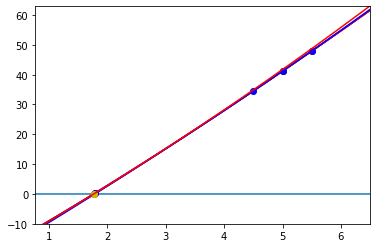

In [57]:
fx = lambda x: x * x**(1./2.) + 10 * x - 20

def graf():
    n=len(ListaXr)
    raiz=ListaXr[n-1]
    if not(n==0):
        #eje x
        dom = np.arange(min(x0,raiz)-1, max(x1,raiz)+1,10**-4)
        range = [0 for xi in dom]
        plt.plot(dom, range)

        #eje y
        range = np.arange(min(fx(x0),fx(x1))-15,max(fx(x0),fx(x1))+15,10**-4)
        dom = [0 for xi in range]
        plt.plot(dom, range)

        plt.axis([min(x0,raiz)-1, max(x1,raiz)+1,-10,max(fx(x0),fx(x1))+15])

        #Funcion
        dom = np.arange(min(x0,raiz)-1, max(x1,raiz)+1,10**-4)
        range = [fx(xi) for xi in dom]
        plt.plot(dom, range, 'r')

        i=0
        #Dibujado de los puntos
        while not(i==n):
            #Se obtiene los puntos de la iteracion
            p1=ListaXa[i]
            p2=ListaXb[i]
            p3=ListaXc[i]


            #Puntos (a,0) y (b,0)
            plt.plot(p1,fx(p1),'bo')
            plt.plot(p2,fx(p2),'ro')
            plt.plot(p3,fx(p3),'yo')
            fx2 = lambda x: ListaA[i] * (x-p3)**2 + ListaB[i] * (x-p3) + ListaC[i]
            #Funcion
            dom = np.arange(min(x0,raiz)-1, max(x1,raiz)+1,10**-4)
            range = [fx2(xi) for xi in dom]
            if(i%2==0):
                plt.plot(dom, range, 'b')
            else:
                plt.plot(dom, range, 'r')

            i=i+1


graf()

Podemos observar que las funciones cuadraticas generadas por el metodo de Muller son casi identicas a la original, lo que nos da una mejor idea de su convergencia a la hora de encontrar raices de funciones irracionales. Y con la cantidad de iteraciones que se hicieron, se puede observar la alta eficiencia del metodo. 

# Regula falsi

Sabemos que el método de falsa posición, o Regula falsi, es un caso alternativo al método de bisección, donde ya no encontramos la raíz a base de puntos medios entre los intervalos de $a$ y $b$, sino que los obtenemos a partir de una fórmula que nace de la visualización gráfica de los intervalos que encierran la raíz en nuestra función creando una línea recta entre los puntos $(a,f(a))$ y $(b,f(b))$, cuya intersección con el eje de las $x$ nos provee una mejor aproximación de la raíz.
 
Entonces encontramos que, por medio de ciertos despejes, nuestra fórmula era la siguiente:
 
$ x = b - \frac{f(b)(a-b)}{f(a)-f(b)}$
 
Con todo esto ya podemos empezar a aplicar el método de Regula Falsi a un código que nos permita encontrar las raíces de cualquier función irregular.

### **Implementación**

Se desea encontrar la raíz de la siguiente función:
 
$ x^{1/3}+4x^2-10 = 0$
 
en el rango de $[1,2]$ con una tolerancia de 0.0001.
 
Para abordar este problema se creará un código que funcionará con el algoritmo del método de falsa posición.

#### Definición de variables
 
El primer paso sería definir el input de nuestra función, pues para poder trabajar con regula falsi se necesita de **la función que queremos evaluar** ( $f(x)=0$ ), **los puntos iniciales a utilizar**, y **la tolerancia mínima** que deseamos alcanzar. Es importante destacar que el algoritmo no puede funcionar si alguno de estos hace falta.

In [58]:
####### INGRESO #######

#Funcion de la que deseamos encontrar la raiz
fx = lambda x: x**(1/3) + 4*(x**2) -10

#Puntos iniciales
a = 1
b = 2

#Tolerancia de error
tolera = 0.0001

#### Cálculo del error absoluto
 
Para que el algoritmo sepa cuando debe de parar, se debe comparar nuestra **tolerancia** con el **error absoluto** que se obtenga de cada iteración. Por esto mismo creamos una función que nos devuelva el **error absoluto** dado dos valores.

In [59]:
def err_abs(x2, x1):
    return abs(x2 - x1)

Donde el error absoluto es el valor absoluto de la resta del valor obtenido menos el valor inicial. El valor inicial dependerá del valor de c, pues este puede llegar a sustituir tanto a $a$ como a $b$ dependiendo quien se encuentre más cerca de la raíz.

#### Cálculo de C
 
Se define una función que nos devolverá la siguiente aproximación de la raíz dado los puntos de la iteración en la que nos encontremos. Es en esta que se hará uso de la fórmula antes mencionada anteriormente.

In [60]:
def aprox(p1, p2):
    #Calculo de las funciones evaluadas en a y b
    fp1 = fx(p1)
    fp2 = fx(p2)

    #Calculo de c
    c = p2 - fp2*(p1-p2)/(fp1-fp2)
    return c

#### Función Regula falsi
 
La función, siguiente el algoritmo del método de falsa posición y haciendo uso de las funciones anteriores, sería la siguiente:

In [61]:
import numpy as np

def regulaFalsi(p1, p2,tolera,fx):
    try:
        ####### PROCEDIMIENTO #######

        #Calculo del error absoluto inicial
        tramo = err_abs(p1,p2)

        #Confirmamos que el intervalo a evaluar sea valido
        if(tramo<=tolera):
            return "no se puede encontrar raices para este intervalo"

        #Se confirma que se cumpla la tolerancia antes de entrar a una iteracion
        while not(tramo<=tolera):

            c=aprox(p1,p2)
            fc = fx(c)

            #si fc es 0 el procedimiento termina pues se a encontrado la raiz
            if(fc==0):
                return c
            #Deduccion de la sustitucion de a o b con c
            cambia = np.sign(fx(p1))*np.sign(fc)
            if (cambia > 0):
                #Se calcula el error en funcion de c y a
                tramo = err_abs(c,p1)
                #c se convierte en el nuevo p1
                p1 = c
            else:
                #Se calcula el error en funcion de c y b
                tramo = err_abs(p2,c)
                #c se convierte en el nuevo p2
                p2 = c
            
        return c
    except ZeroDivisionError:
        return "no se puede encontrar raices para este intervalo"

Podemos observar que antes de empezar con cualquier iteración confirmamos que el intervalo enviado sea válido, verificando que el error absoluto entre $p1$ y $p2$ no sea menor o igual a la tolerancia (que se traduce a que los puntos 1 y 2 no pueden ser iguales ni pueden estar excesivamente cerca); de esta manera evitamos cualquier tipo de error relacionado con los puntos iniciales.
 
Una vez confirmado que los puntos iniciales sean válidos, se procede a entrar a la primera iteración donde se hace la llamada a nuestra función $aprox$ que nos devolverá nuestra primera aproximación a la raíz. Después de esto, se busca el valor con el que se intercambiara $c$ ($a$ o $b$) haciendo una multiplicación de los signos de $f(p1)$ y $f(c)$, donde si el resultado es mayor a 0, $c$ pasa a ser el nuevo $p1$ y caso contrario $c$ pasa a ser el nuevo $p2$, antes de esta sustitución se calcula el error absoluto de c con el valor que sustituye.
 
De esta manera termina una iteración y vuelve a comenzar el ciclo while hasta que se cumpla con la tolerancia, en cuyo caso se retornará el valor final de c y terminará la función.

Es importante destacar el uso de un try catch que encierra todo nuestro código, pues al trabajar con funciones irracionales, debemos tener en cuenta que habrá casos en los que ciertos valores rompan nuestro código, principalmente las divisiones entre 0, y de esta manera evitamos que esta clase de errores lleguen a afectar el funcionamiento de nuestro programa.

In [62]:
####### SALIDA #######
raiz = regulaFalsi(a,b,tolera,fx)
print('- La raiz obtenida fue: ',raiz)


- La raiz obtenida fue:  1.4881407353505989


Lo último que queda es llamar la función, enviando los valores definidos en el primer paso. Si no hemos enviado ningún intervalo inválido, la función nos devolverá la raíz de la función, que para el caso de 1 y 2 en la función $ x^{1/3}+4x^2-10 = 0$ es 1.4881407353505989.

### **Visualizacion del proceso**

Aunque es definitivamente útil encontrar la raíz de cualquier ecuación irracional, con el código actual el usuario se encuentra ajeno  a cualquier tipo de proceso que no sea la respuesta; por ello se codificaran las gráficas y tablas que ayuden a una mejor comprensión del proceso que conlleva el método.

#### Gráfica
 
Para la función anterior también podemos diseñar un código que nos permita visualizar el proceso del método para encontrar la raíz. Para ello debemos hacer unos cuantos cambios al código que ya teníamos, en la forma de dos listas que llevarán el control de los puntos $a$ y $b$ a lo largo de las iteraciones y un contador para saber el total de iteraciones realizadas durante la ejecución del programa.

In [63]:
#Listas de puntos a y b
listA =[]
listB =[]

def regulaFalsi(p1, p2,tolera,fx):
    try:
        listA.clear
        listB.clear
        #Contador de iteraciones
        i=0
        tramo = err_abs(p1,p2)

        if(tramo<=tolera):
            return "no se puede encontrar raices para este intervalo",i

        while not(tramo<=tolera):
            listA.append(p1)
            listB.append(p2)
            #Se aumenta el numero de iteracion
            i=i+1
            c=aprox(p1,p2)
            fc = fx(c)
            
            if(fc==0):
                return c
            cambia = np.sign(fx(p1))*np.sign(fc)
            if (cambia > 0):
                tramo = err_abs(c,p1)
                p1 = c
            else:
                tramo = err_abs(p2,c)
                p2 = c
            
        return c,i
    except ZeroDivisionError:
        return "no se puede encontrar raices para este intervalo",i

####### SALIDA #######
raiz = regulaFalsi(a,b,tolera,fx)
print('- La raiz obtenida fue: ',raiz[0])

- La raiz obtenida fue:  1.4881407353505989


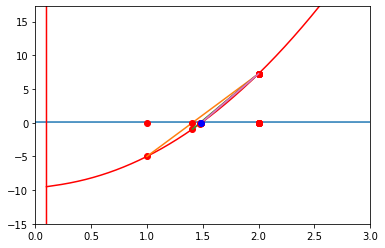

In [67]:
import matplotlib.pyplot as plt

def graf():
    #eje x
    dom = np.arange(min(a,raiz[0])-1, max(b,raiz[0])+1,10**-5)
    range = [0.1 for xi in dom]
    plt.plot(dom, range)

    #eje y
    range = np.arange(min(fx(a),fx(b))-10, max(fx(a),fx(b))+10,10**-5)
    dom = [0.1 for xi in range]
    plt.plot(dom, range, 'r')

    plt.axis([min(a,raiz[0])-1, max(b,raiz[0])+1, min(fx(a),fx(b))-10, max(fx(a),fx(b))+10])

    #Funcion
    dom = np.arange(0.1,5,10**-5)
    range = [fx(xi) for xi in dom]
    plt.plot(dom, range, 'r')

    i=0
    #Dibujado de los puntos
    while not(i==raiz[1]):
        #Se obtiene los puntos de la iteracion
        p1=listA[i]
        p2=listB[i]


        #Puntos (a,0) y (b,0)
        plt.plot(p1,0,'ro')
        plt.plot(p2,0,'ro')

        #Puntos (a,f(a)) y (b,f(b))
        plt.plot(p1,fx(p1),'ro')
        plt.plot(p2,fx(p2),'ro')

        #Linea entre los puntos (a,f(a)) y (b,f(b))
        plt.plot([p1,p2],[fx(p1),fx(p2)])
        i=i+1

    #raiz
    plt.plot(raiz[0],0,'bo')
    plt.show()

graf()

Haciendo uso de las listas, y por medio de un while, se dibujan todos los puntos y las líneas rectas entre los mismos que nos ayudan a encontrar la raíz de la función, de manera que podemos visualizar de mejor manera como trabaja el método de falsa posición. También podemos observar el resultado final (la raíz) representada por el punto azul.

#### Tablas
 
Otro recurso que podemos crear para la mejor visualización de las iteraciones de regula falsi son las tablas, en donde podemos mostrar los valores de $a$, $b$, $c$ y el error absoluto en cada una de las iteraciones.
 
Para ello crearemos nuevas listas que nos ayuden a guardar los valores de $c$ y el error, así como también para ir guardando los valores de $f(a)$, $f(b)$ y $f(c)$; estos últimos para una mejor visualización del intercambio de $c$ con $a$ o $b$

In [15]:
#Listas de puntos a y b
listA =[]
listB =[]

#Lista de raices c
listC =[]

#Listas para f(a), f(b), f(c)
listFa=[]
listFb=[]
listFc=[]

#Lista de error absoluto
listErr=[]

def regulaFalsi(p1, p2,tolera,fx):
    try:
        listA.clear
        listB.clear
        listC.clear
        listFa.clear
        listFb.clear
        listFc.clear
        listErr.clear
        i=0
        tramo = err_abs(p1,p2)

        if(tramo<=tolera):
            return "no se puede encontrar raices para este intervalo",i

        while not(tramo<=tolera):
            #Se aumenta el numero de iteracion
            i=i+1
            c=aprox(p1,p2)
            fc = fx(c)
            #Se añaden los datos a las listas
            listA.append(p1)
            listB.append(p2)
            listFa.append(fx(p1))
            listFb.append(fx(p2))
            listErr.append(tramo)
            listC.append(c)
            listFc.append(fx(c))

            if(fc==0):
                return c

            cambia = np.sign(fx(p1))*np.sign(fc)
            if (cambia > 0):
                tramo = err_abs(c,p1)
                p1 = c
            else:
                tramo = err_abs(p2,c)
                p2 = c
            
        return c,i
    except ZeroDivisionError:
        return "no se puede encontrar raices para este intervalo",i

####### SALIDA #######
raiz = regulaFalsi(a,b,tolera,fx)
print('- La raiz obtenida fue: ',raiz[0])

- La raiz obtenida fue:  1.4881407353505989


Con estos cambios podemos crear un objeto json que contendrá las listas creadas y que servirá como la fuente de datos para la tabla que deseamos crear.

In [16]:
import pandas as pd

Table ={
    "a": listA,
    "b": listB,
    "fa": listFa,
    "fb": listFb,
    "c": listC,
    "fc": listFc,
    "err": listErr
}

df = pd.DataFrame(Table)
print("\n Tabla: \n")
pd.set_option("display.precision",5)
display(df)


 Tabla: 



,a,b,fa,fb,c,fc,err
0,1.00000,2,-5.00000,7.25992,1.40783,-0.95125,1.00000
1,1.40783,2,-0.95125,7.25992,1.47643,-0.14187,0.40783
2,1.47643,2,-0.14187,7.25992,1.48647,-0.02036,0.06860
3,1.48647,2,-0.02036,7.25992,1.48791,-0.00291,0.01004
4,1.48791,2,-0.00291,7.25992,1.48811,-0.00041,0.00144
5,1.48811,2,-0.00041,7.25992,1.48814,-0.00006,0.00020


# Newton en C

Con este código, ahora somos capaces de crear y mostrar tablas con los datos de cada iteración de regula falsi y de esta manera tener una mejor comprensión del proceso realizado por nuestro código y algoritmo en general.

Recordando que el método de Newton Raphson es un caso particular del método de Iteración de Punto Fijo (IPF), y para hacer uso de él necesitamos un valor inicial que consideraremos como $z_0$, la función a analizar $f(z)$, y la derivada de dicha función $f'(z)$

Luego de haber realizado la deducción de Newton se obtuvo la siguiente fórmula a utilizar: 

$ x_n = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})} $

Sustiyendo $x$ por $z$

$ z_n = z_{n-1} - \frac{f(z_{n-1})}{f'(z_{n-1})} $

Con la fórmula presentada anteriormente se procede a codificar el método de Newton Raphson, con el cual encontraremos raíces de funciones irracionales en los complejos $\mathbb{C}$

### Implementación del Método

Utilizar el método de Newton para aproximar el valor de la raíz de la función $f(z) = \sqrt[3]{z} + z^7$ con un valor inicial $z_0 = 2 + 2j$ y una tolerancia de $10^{-9}$

##### Importando libreria necesaria

In [17]:
from sympy import *

##### Simbolizando la variable a utilizar $z$

In [18]:
z = Symbol("z")

##### Función a analizar

In [19]:
f = (z)**(1/3) + z**7

Se procede a mostrar la función $f$

In [20]:
f

z**0.333333333333333 + z**7

##### Derivada de la función a analizar

In [21]:
fprime = f.diff(z)

Se procede a mostrar la derivada de la función $f'$

In [22]:
fprime

0.333333333333333/z**0.666666666666667 + 7*z**6

##### Lambdificando funciones

In [23]:
f = lambdify(z, f)
fprime = lambdify(z, fprime)

##### Tolerancia

In [24]:
TOL = 10**(-9)

##### Punto inicial 

In [25]:
z0 = 2 + 2j

### Cálculo del Error Absoluto

El error absoluto será analizado en cada iteración lo que nos permitirá detenernos cuando el error sea menor al valor de la tolerancia brindada por el usuario.

In [26]:
def err_abs(x2, x1):
    return abs(x2 - x1)

### Función para almacenar datos en un tabla

Antes de crear la función para almacenar datos en la tabla, es necesario definir la tabla como un diccionario, donde cada elemento definido va a corresponder a una columna de la tabla.

La libreria pandas se importa para ser usado posteriormente al momento de mostrar dicha tabla.

In [27]:
import pandas as pd
pd.set_option("display.precision", 6)

table = {
        "z_n": [],
        "f(z_n)": [],
        "df(z_n)": [],
        "z_(n+1)": [],
        "Error": [],
}

Se procede a la creación de la función que recibirá como argumento el punto inicial $z_0$, el punto siguiente $z$, la función evaluada en el punto inicial $f(z_0)$, la derivada evaluada en el valor inicial $f'(z_0)$, y finalmente el error absoluto de la iteración siguiente menos la iteración anterior.

In [28]:
def add_table_info(z0, z, fzo, fpzo, error):
    
    table["z_n"].append(z0)
    table["f(z_n)"].append(fzo)
    table["df(z_n)"].append(fpzo)
    table["z_(n+1)"].append(z)
    table["Error"].append(error)

### Función para el Método de Newton Raphson

Se define la función que se encargará de iterar el Método de Newton Raphson, recibe como argumento el punto inicial $z_0$, la función $f(z)$, la derivada de la función $f'(z)$ y el número máximo de iteraciones $n_{max}$.

Dicha función se encarga de verificar que la derivada evaluada en el punto inicial sea diferente de $0$, si es así se continua con el método. Dentro de la función se va calculando el error absoluto en cada iteración y se añaden los datos a la tabla, tabla que posteriormente será mostrada.

El bucle se detiene si el $error$ es menor que la $TOL$ brindada por el usuario, si se alcanzó el número máximo de iteraciones o si derivada evaluada en el punto $z$ es igual a $0$.

Finalmente, se muestra el valor de la raíz encontrada y se retorna la tabla.

In [29]:
root = 0
def newton(z0, f, fprime, n_max):
    
    i = 0

    if fprime(z0) != 0:
        
        while True:
            
            z = z0 - f(z0)/fprime(z0)
            error = err_abs(z0, z)
            add_table_info(z0, z, f(z0), fprime(z0), error)
            
            if error < TOL or i + 1 == n_max or fprime(z) == 0:
                break
            
            z0 = z
            i += 1
            global root 
            root = z0
            
        print("La raíz es: ", z0)
        return table

Se almacena el resultado de la función "newton" a la cual se le envian los argumentos necesarios para su funcionamiento.

In [30]:
result = newton(z0, f, fprime, 100)

La raíz es:  (0.8910065241883679+0.4539904997395467j)


Si hubo algun resultado se procede a mostrar la tabulación generada por el método de Newton

In [31]:
if result:
    df = pd.DataFrame(table)
    display(df)

,z_n,f(z_n),df(z_n),z_(n+1),Error
0,2.000000+2.000000j,1.025366e+03-1.023634e+03j,0.144338-3584.083333j,1.714383+1.713923j,4.042491e-01
1,1.714383+1.713923j,3.488564e+02-3.478650e+02j,-0.984324-1420.736040j,1.469705+1.468207j,3.467617e-01
2,1.469705+1.468207j,1.188837e+02-1.181638e+02j,-1.543747-562.752908j,1.260311+1.256379j,2.978538e-01
3,1.260311+1.256379j,4.069726e+01-4.008780e+01j,-1.887641-222.429122j,1.081649+1.071895j,2.568154e-01
4,1.081649+1.071895j,1.410663e+01-1.355010e+01j,-2.153414-087.3817440j,0.930652+0.906737j,2.237800e-01
5,0.930652+0.906737j,5.055927e+00-4.527299e+00j,-2.384081-033.7201230j,0.807607+0.748100j,2.007634e-01
6,0.807607+0.748100j,1.970461e+00-1.448009e+00j,-2.558313-012.2818850j,0.726641+0.570798j,1.949137e-01
7,0.726641+0.570798j,9.205619e-01-3.599735e-01j,-2.5466620-3.4344270j,0.787254+0.347704j,2.311816e-01
8,0.787254+0.347704j,6.016138e-01+2.112604e-01j,-1.9164760+1.6117800j,0.916820+0.566905j,2.546298e-01
9,0.916820+0.566905j,-2.465603e-01-9.457203e-01j,-10.5057550-2.0930530j,0.876997+0.484819j,9.123526e-02


### Función que mostrará el fractal generado por el Método de Newton

Se procede a mostrar la derivada de la función $f'$

In [32]:
import numpy as np
import matplotlib.pyplot as plt

Se crea una función que será la encarga de iterar el Método de Newton para pintar el fractal 

In [33]:
def newton_fractal(z0, f, fprime, Nmax=1000):
    z = z0
    for i in range(Nmax):
        dz = f(z) / fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

Se define el dominio para el fractal

In [34]:
dom = 10

Se crea un arreglo con los posibles esquemas de colores a implementar en el fractal

In [35]:
colormaps = ["binary", "viridis", "plasma", "inferno", "magma", "cividis", "Wistia"]

Posteriormente se crea la función que llevará a cabo la creación del fractal, necesita recibir la función $f$, el esquema de colores con el que se va a mapear el fractal, la derivada de la función $f'$, un número $n$ de iteraciones, y el dominio $dom$ del fractal.

In [36]:
def plot_newton_fractal(f, cmap, fprime, n=200, domain=(-dom, dom, -dom, dom), ):
    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y * 1j
            r = newton_fractal(z0, f, fprime)
            if r:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()

Se procede a llamar a la función brindandole los argumentos necesarios para su ejecución y se espera el fractal generado para $f$

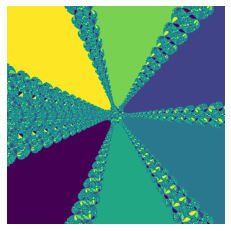

In [37]:
plot_newton_fractal(f, 'viridis', fprime, n=1000)

### Graficando la raíz en coordenadas Polares

Importanto libreria necesaria

In [38]:
import cmath

Convirtiendo de forma binómica a polar, crearemos variables para la magnitud y ángulo de nuestra raíz, para posteriormente mostrar la gráfica con dichos valores

Magnitud:  1.0
Angulo:  26.999999999999993


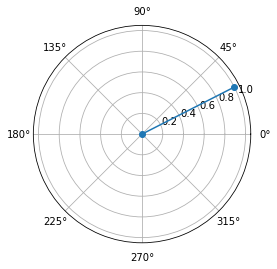

In [39]:
magnitud, angulo = cmath.polar(root)

print("Magnitud: ", magnitud)
print("Angulo: ", angulo*180/cmath.pi)

plt.polar([0, angulo], [0,magnitud], marker="o")

# Metodo de la secante

Este método es una variación del método de Newton-Raphson, pero a diferencia de Newton el método de la secante no calcula la derivada de la función asignada al punto de estudio, sino que esta se aproxima a la pendiente recta que une la función que está siendo evaluada en el punto de estudio, y el de la iteración previa.Este método es útil cuando el coste computacional de
realizar la derivación es demasiado alto, haciendo el método de Newton-Raphson no tan recomendado. El método de la secante parte de dos puntos y estima la tangente por aproximación de acuerdo a la fórmula:
 
$f^′(x_0) = \frac{f(x_1) − f(x_0)}{x_1 − x_0}$
 
La anterior aproximación se sustituye en Newton-Raphson para la siguiente ecuación iterativa:
 
$x_{i+1} =x_{i-1}-\frac{f(x_{i-1})(x_i − x_{i-1})}{f(x_i) − f(x_{i-1})}$

### Implementacion 

Se desea encontrar la raíz de la siguiente función:
 
 $\frac{1}{\sqrt{x}} - 5x = 0$
 
en el rango de $[0.1,2]$ con una tolerancia de 0.0001.
 
Para abordar este problema se creará un código que funcionará con el algoritmo del método de la secante.

#### Librerias
Primero se importan todas las librerias que se necesitara para la resolucion del problema

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Cálculo del error absoluto
 
Para que el algoritmo sepa cuando debe de parar, se debe comparar nuestra **tolerancia** con el **error absoluto** que se obtenga de cada iteración. Para ello se crea una función que devolvera el **error absoluto** dado dos valores.

In [41]:
def err_abs(x2, x1):
    return abs(x2 - x1)

#### Cálculo de $x_{i+1}$
 
Para el calculo de la aproximacion $x_{i+1}$, se realizara por medio las siguientes funciones:

In [42]:
def Pendiente(x1,x2,f):
    #Se confirma que no sean los mismos puntos
    if(x1==x2):
        return 'Ingrese dos puntos distintos'
    else:
        #Se realiza el calculo de la pendiente
        m = (f(x2)-f(x1))/(x2-x1)
        return m

Con esta primera función se obtendrá la pendiente de la línea formada entre los puntos $(x_1,f(x_1))$ y $(x_2,f(x_2))$, la cual será utilizada en la siguiente función para encontrar el valor de $x_{i+1}$.

In [43]:
def CorteEjex(x1,x2,f):
    # Se obtiene la pendiente para x1 y x2
    m = Pendiente(x1,x2,f)
    # Se realiza el calculo de xc
    x= x1 -(1/m)*f(x1)
    return x

Haciendo uso de la función **Pendiente**, se realizan los cálculos necesarios para encontrar el valor de $x$ donde nuestra línea recta corta con el eje de las $x$, y este valor que obtengamos vendrá a ser nuestro $x_{i+1}$.

#### Secante

La última función que necesitaremos es una que se encargue de realizar el algoritmo del método de la secante, donde los valores recibidos son los puntos iniciales $a$, $b$; la función de la cual deseamos encontrar la raíz, y la tolerancia mínima que deseamos que tenga nuestra respuesta.

In [44]:
def secante(fx,xa,xb,tolera):
    try:
        # Tabla que poseera la informacion de cada iteracion 
        tabla = []

        # Calculo del erro absoluto inicial
        tramo = err_abs(xa,xb)

        # Confirmamos que el intervalo a evaluar sea valido
        if(tramo<=tolera):
            return tabla

        # Se confirma que se cumpla la tolerancia antes de entrar a una iteracion
        while (tramo>=tolera):

            xc = CorteEjex(xa,xb,fx)
            fc= fx(xc)

            # Si fc es 0 el procedimiento termina pues se a encontrado la raiz
            if(fc==0):
                return tabla

            # Se calcula el error en funcion de xc y xa
            tramo = err_abs(xc,xa)
            
            # Se agrega la informacion de la iteracion actual a tabla
            tabla.append([xa,xb,xc,tramo])

            #Se intercambian los valores de xa, xb y xc
            xb = xa
            xa = xc
        
        tabla = np.array(tabla)
        return tabla
    except ZeroDivisionError:
        return []


Podemos observar que antes de empezar con cualquier iteración se confirma la validez del intervalo enviado, pues si el error absoluto entre los valores iniciales es menor o igual a la tolerancia, significa que los puntos pueden ser iguales o estar excesivamente cerca, y esta clase de intervalos pueden afectar el proceso del algoritmo, provocando respuestas incorrectas o que nuestra función se rompa.
 
Una vez confirmado que los puntos iniciales sean válidos, se procede a entrar a la primera iteración donde se hace la llamada a nuestra función **CorteEjex** que nos devolverá nuestra primera aproximación a la raíz. Se confirma que la función evaluada en este nuevo valor sea 0, pues de serlo el proceso termina y se devuelve la tabla con los valores de cada iteración; caso contrario se sigue con el proceso normal. Después, se calcula el nuevo error absoluto y se agregan los valores $xa$,$xb$,$xc$y el error absoluto de esta iteración. Finalmente se intercambian los valores de $xb$ con el de $xa$ y $xa$ con el de $xc$.
 
De esta manera termina una iteración y vuelve a comenzar el ciclo while hasta que se cumpla con la tolerancia, en cuyo caso se retornará la tabla que posee todos los valores de nuestro puntos a lo largo de todas las iteraciones y terminará la función.
 
Es importante destacar el uso de un try catch que encierra todo nuestro código, pues al trabajar con funciones irracionales, debemos tener en cuenta que habrá casos en los que ciertos valores rompan nuestro código, principalmente las divisiones entre 0, y de esta manera evitamos que esta clase de errores lleguen a afectar el funcionamiento de nuestro programa.

Ahora podemos probar el procedimiento con los datos anteriormente pedidos:

In [45]:
# INGRESO
# Funcion
fx = lambda x: 1/x**(1./2.) - 5*x

# Puntos iniciales
a  = 0.1
b  = 2

# Tolerancia
tolera = 0.0001

# PROCEDIMIENTO
# Se llama a la funcion secante
tabla = secante(fx,a,b,tolera)
# Obtenemos el tamaño de la lista
n = len(tabla)
# Se confirma que tabla no venga vacia
if (n==0):
    raiz = "No se encontro raiz para este intervalo"
else:
    #Obtenemos el ultimo valor guardado de xc
    raiz = tabla[n-1,2]

# SALIDA
print(raiz)

0.3419951892871315


Al finalizar el proceso se obtiene que la raíz para la función $\frac{1}{\sqrt{x}}-5x = 0$ en el intervalo de $[0.1,2]$ es 0.3419952686500059.

#### Tablas

Por la manera en la que se realizó el algoritmo no es fácil realizar la implementación de una tabla que muestre el proceso del algoritmo a lo largo de sus iteraciones.

In [46]:
# Se confirma que la funcion secante no haya devuelto una lista vacia
if not(n==0):
    # Listas que contendran los valores de las iteraciones
    ListXa = []
    ListXb = []
    ListXc = []
    ListErr = []

    np.set_printoptions(precision=4)
    for i in range(0,n,1):
        # Se guardan los valores de las iteraciones en su lista correspondiente
        ListXa.append(tabla[i,0])
        ListXb.append(tabla[i,1])
        ListXc.append(tabla[i,2])
        ListErr.append(tabla[i,3])

    # Objeto Json que servira como fuente de datos para la tabla
    Table ={
        "x_a": ListXa,
        "x_b": ListXb,
        "x_c": ListXc,
        "err": ListErr
    }

    df = pd.DataFrame(Table)
    pd.set_option("display.precision",5)
    display(df)


,x_a,x_b,x_c,err
0,0.10000,2.00000,0.52311,4.23108e-01
1,0.52311,0.10000,0.38918,1.33923e-01
2,0.38918,0.52311,0.33757,5.16111e-02
3,0.33757,0.38918,0.34214,4.56372e-03
4,0.34214,0.33757,0.34200,1.41874e-04
5,0.34200,0.34214,0.34200,4.63477e-07


Con este código, ahora somos capaces de crear y mostrar tablas con los datos de cada iteración del método de la secante y de esta manera tener una mejor comprensión del proceso realizado por nuestro código y algoritmo en general.

#### Gráficos


Otro recurso que crearemos para la mejor visualización de las iteraciones del método de la secante son los gráficos, en donde mostraremos las distintas rectas que nos ayudan a encontrar la raíz.
 
Para ello haremos uso de las listas creadas en las tablas.

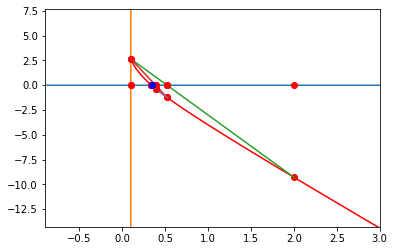

In [47]:
import matplotlib.pyplot as plt

def graf():
    if not(n==0):
        #eje x
        dom = np.arange(min(a,raiz)-1, max(b,raiz)+1,10**-5)
        range = [0 for xi in dom]
        plt.plot(dom, range)

        #eje y
        range = np.arange(min(fx(a),fx(b))-5,max(fx(a),fx(b))+5,10**-5)
        dom = [0.1 for xi in range]
        plt.plot(dom, range)

        plt.axis([min(a,raiz)-1, max(b,raiz)+1,min(fx(a),fx(b))-5,max(fx(a),fx(b))+5])

        #Funcion
        dom = np.arange(0.1,5,10**-5)
        range = [fx(xi) for xi in dom]
        plt.plot(dom, range, 'r')

        i=0
        #Dibujado de los puntos
        while not(i==n):
            #Se obtiene los puntos de la iteracion
            p1=ListXa[i]
            p2=ListXb[i]


            #Puntos (a,0) y (b,0)
            plt.plot(p1,0,'ro')
            plt.plot(p2,0,'ro')

            #Puntos (a,f(a)) y (b,f(b))
            plt.plot(p1,fx(p1),'ro')
            plt.plot(p2,fx(p2),'ro')

            #Linea entre los puntos (a,f(a)) y (b,f(b))
            plt.plot([p1,p2],[fx(p1),fx(p2)])
            i=i+1

        #raiz
        plt.plot(raiz,0,'bo')
        plt.show()

graf()

Haciendo uso de las listas, se dibujan todos los puntos y las líneas rectas entre los mismos que nos ayudan a encontrar la raíz de la función. También podemos observar el resultado final (la raíz) representada por el punto azul.